# Univariate linear regression
## Definition
**Linear regression** includes any approach to modelling a predictive relationship for one set of variables based on another set of variables, in such a way that unknown parameters appear linearly.
### The model representation
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

- Dependent Variable (Target, Response, `y`): The variable we are trying to predict or explain.
- Independent Variable (Predictor, Feature, `x`): The variable(s) used to predict the dependent variable.
  
Below is an example of an univariate linear regression model:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


# The data is just about y = 2x
x_train = np.array([1, 2, 5, 6, 40, 80, 13])
y_train = np.array([2, 4, 10, 12, 80, 160, 26])

Now let plots the data

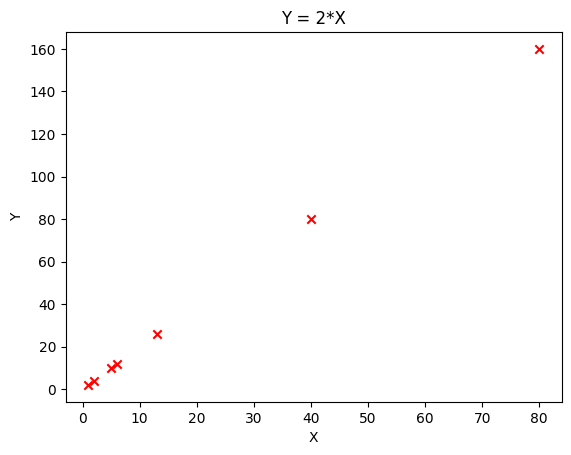

In [2]:
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Y = 2*X")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.show()

Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [15]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output.

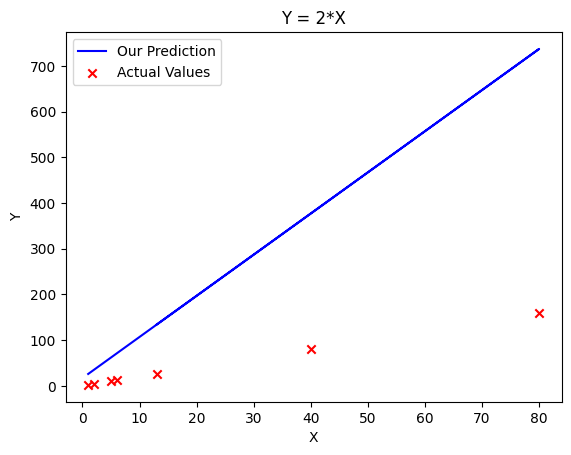

In [16]:
# Give random params
w = random.randint(0, 20)
b = random.randint(0, 20)

tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Y = 2*X")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.legend()
plt.show()

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$MSE(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [17]:
def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Now let to see how our model cost:

In [18]:
print(compute_cost(x_train, y_train, w, b))

31466.0


## Gradient descent summary
Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for minimizing a differentiable multivariate function.

The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a trajectory that maximizes that function; the procedure is then known as gradient ascent. It is particularly useful in machine learning for minimizing the cost or loss function.
### Description
Gradient descent is based on the observation that if the multi-variable function $F(\mathbf{x})$ is defined and differentiable in a neighborhood of a point $\mathbf{a}$, then $F(\mathbf{x})$ decreases fastest if one goes from $\mathbf{a}$ in the direction of the negative gradient of $F$ at $\mathbf{a}$,  
i.e.,  

$$
-\nabla F(\mathbf{a})
$$

It follows that, if:

$$
\mathbf{a}_{n+1} = \mathbf{a}_n - \gamma \nabla F(\mathbf{a}_n)
$$

where $\gamma$ is the learning rate.

### Apply descend gradient to our model
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $MSE(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$


In our case (y = 2x model), *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

Let to create now the gradient function that compute the gradient for the cost $MSE$ function.

In [19]:
def compute_gradient(x, y, w, b): 
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

Below is the implementation of descend gradient.

In [27]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function): 

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w_in , b_in)     

        # Update Parameters using equation (3) above
        b_in = b_in - alpha * dj_db                            
        w_in = w_in - alpha * dj_dw                            

 
    return w_in, b_in

In [35]:
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-3
# run gradient descent
w_final, b_final = gradient_descent(x_train ,y_train, w, b, tmp_alpha, 
                                                    iterations, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  2.0000,  0.0000)


Let calcute the actual cost

In [36]:
print(compute_cost(x_train, y_train, w_final, b_final))

0.0


Plot now the new result

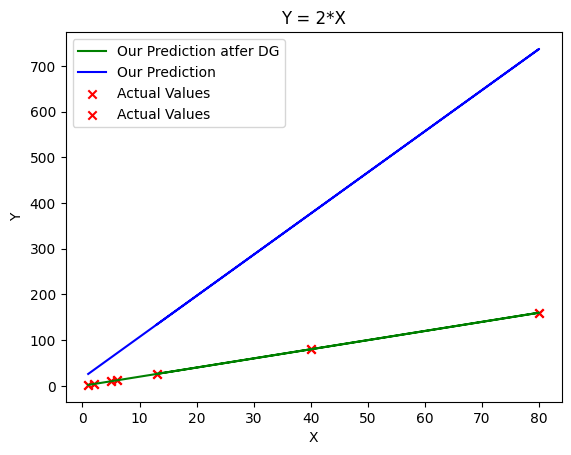

In [37]:
tmp_f_wb = compute_model_output(x_train, w, b)
tmp_f_wb_g = compute_model_output(x_train, w_final, b_final)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb_g, c='g',label='Our Prediction atfer DG')
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Y = 2*X")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.legend()
plt.show()